In [2]:
import numpy as np
from datetime import datetime, timedelta
from pyproj import Proj
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import sys
import pandas as pd
from pandas import DataFrame
import metpy
sys.path.append('../pyBKB_v3')
from netCDF4 import Dataset

In [3]:
dataset = Dataset('OR_ABI-L1b-RadC-M6C01_G16_s20191771401199_e20191771403572_c20191771404018.nc')

In [4]:
print (dataset.variables.keys())

odict_keys(['Rad', 'DQF', 't', 'y', 'x', 'time_bounds', 'goes_imager_projection', 'y_image', 'y_image_bounds', 'x_image', 'x_image_bounds', 'nominal_satellite_subpoint_lat', 'nominal_satellite_subpoint_lon', 'nominal_satellite_height', 'geospatial_lat_lon_extent', 'yaw_flip_flag', 'band_id', 'band_wavelength', 'esun', 'kappa0', 'planck_fk1', 'planck_fk2', 'planck_bc1', 'planck_bc2', 'valid_pixel_count', 'missing_pixel_count', 'saturated_pixel_count', 'undersaturated_pixel_count', 'focal_plane_temperature_threshold_exceeded_count', 'min_radiance_value_of_valid_pixels', 'max_radiance_value_of_valid_pixels', 'mean_radiance_value_of_valid_pixels', 'std_dev_radiance_value_of_valid_pixels', 'maximum_focal_plane_temperature', 'focal_plane_temperature_threshold_increasing', 'focal_plane_temperature_threshold_decreasing', 'percent_uncorrectable_L0_errors', 'earth_sun_distance_anomaly_in_AU', 'algorithm_dynamic_input_data_container', 'processing_parm_version_container', 'algorithm_product_versio

In [5]:
for key in dataset.variables:
    print(key)
    print('--------------'
          
          
          
         )
    print(dataset.variables[key])
          
    

Rad
--------------
<class 'netCDF4._netCDF4.Variable'>
int16 Rad(y, x)
    _FillValue: 1023
    long_name: ABI L1b Radiances
    standard_name: toa_outgoing_radiance_per_unit_wavelength
    _Unsigned: true
    sensor_band_bit_depth: 10
    valid_range: [   0 1022]
    scale_factor: 0.8121064
    add_offset: -25.936647
    units: W m-2 sr-1 um-1
    resolution: y: 0.000028 rad x: 0.000028 rad
    coordinates: band_id band_wavelength t y x
    grid_mapping: goes_imager_projection
    cell_methods: t: point area: point
    ancillary_variables: DQF
unlimited dimensions: 
current shape = (3000, 5000)
filling on
DQF
--------------
<class 'netCDF4._netCDF4.Variable'>
int8 DQF(y, x)
    _FillValue: -1
    long_name: ABI L1b Radiances data quality flags
    standard_name: status_flag
    _Unsigned: true
    valid_range: [0 4]
    units: 1
    coordinates: band_id band_wavelength t y x
    grid_mapping: goes_imager_projection
    cell_methods: t: point area: point
    flag_values: [0 1 2 3 4]
  

In [6]:
print(dataset.variables['band_id'])
print(dataset.variables['band_id'][:])
print(dataset.variables['Rad'][:])

<class 'netCDF4._netCDF4.Variable'>
int8 band_id(band)
    long_name: ABI band number
    standard_name: sensor_band_identifier
    units: 1
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of -127 ignored

[1]
[[-- -- -- ... 77.20086669921875 77.20086669921875 77.20086669921875]
 [-- -- -- ... 77.20086669921875 77.20086669921875 77.20086669921875]
 [-- -- -- ... 77.20086669921875 77.20086669921875 77.20086669921875]
 ...
 [95.06720733642578 95.87931060791016 95.87931060791016 ...
  106.43669128417969 104.81248474121094 105.62458801269531]
 [97.50352478027344 99.9398422241211 99.9398422241211 ...
  106.43669128417969 103.18826293945312 102.37615966796875]
 [102.37615966796875 101.56405639648438 102.37615966796875 ...
  102.37615966796875 99.9398422241211 100.75194549560547]]


In [8]:
#DATE = datetime(2019, 4, 14, 18)


G16 = xarray.open_dataset('OR_ABI-L1b-RadC-M6C01_G16_s20191771401199_e20191771403572_c20191771404018.nc')
print('Band: ',int(G16['band_id'].data),'\n\n')
G_16 = G16['Rad'].data
print(G_16)
print('\n\n\n')

G17 = xarray.open_dataset('OR_ABI-L1b-RadC-M6C01_G17_s20191771401196_e20191771403569_c20191771404008.nc')
G_17 = G17['Rad'].data
print(G_17)

Band:  1 


[[       nan        nan        nan ...  77.20087   77.20087   77.20087 ]
 [       nan        nan        nan ...  77.20087   77.20087   77.20087 ]
 [       nan        nan        nan ...  77.20087   77.20087   77.20087 ]
 ...
 [ 95.06721   95.87931   95.87931  ... 106.43669  104.812485 105.62459 ]
 [ 97.503525  99.93984   99.93984  ... 106.43669  103.18826  102.37616 ]
 [102.37616  101.56406  102.37616  ... 102.37616   99.93984  100.751945]]




[[5.07564545e-02 5.07564545e-02 5.07564545e-02 ... 3.52504913e+02
  3.54129150e+02 3.53317017e+02]
 [5.07564545e-02 5.07564545e-02 5.07564545e-02 ... 3.53317017e+02
  3.57377563e+02 3.59813873e+02]
 [5.07564545e-02 5.07564545e-02 5.07564545e-02 ... 3.50880707e+02
  3.54129150e+02 3.55753357e+02]
 ...
 [5.07564545e-02 5.07564545e-02 5.07564545e-02 ... 9.91277390e+01
  9.58793106e+01 1.01564056e+02]
 [5.07564545e-02 5.07564545e-02 5.07564545e-02 ... 9.91277390e+01
  9.75035248e+01 1.02376160e+02]
 [5.07564545e-02 5.07564545e-02 5.075645

In [10]:
pc = ccrs.PlateCarree()

# Generate cartopy projection object with metpy parser
# NOTE: Don't re-run this cell after it has run or it won't work.
dat16 = G16.metpy.parse_cf('Rad')
dat17 = G17.metpy.parse_cf('Rad')

#print(float(dat16.x.min()))
#print(float(dat16.x.max()))

# Geostationary projections
geos16 = dat16.metpy.cartopy_crs
geos17 = dat17.metpy.cartopy_crs

x16 = dat16.x
y16 = dat16.y

x17 = dat17.x
y17 = dat17.y

/opt/home/adomakor412/.conda/envs/GOESCode/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/opt/home/adomakor412/.conda/envs/GOESCode/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


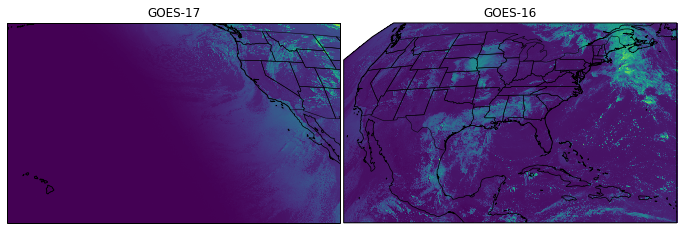

In [11]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection=geos17)
ax2 = fig.add_subplot(1, 2, 2, projection=geos16)


## GOES 17
ax1.imshow(G_17, origin='upper', extent=(x17.min(), x17.max(), y17.min(), y17.max()),
           transform=geos17)
ax1.coastlines(resolution='50m', color='black', linewidth=.75)
ax1.add_feature(ccrs.cartopy.feature.STATES, linewidth=.5)
ax1.set_title('GOES-17')

## GOES 16
ax2.imshow(G_16, origin='upper', extent=(x16.min(), x16.max(), y16.min(), y16.max()),
           transform=geos16)
ax2.coastlines(resolution='50m', color='black', linewidth=.75)
ax2.add_feature(ccrs.cartopy.feature.STATES, linewidth=.5)
ax2.set_title('GOES-16')

fig.subplots_adjust(wspace=.01)

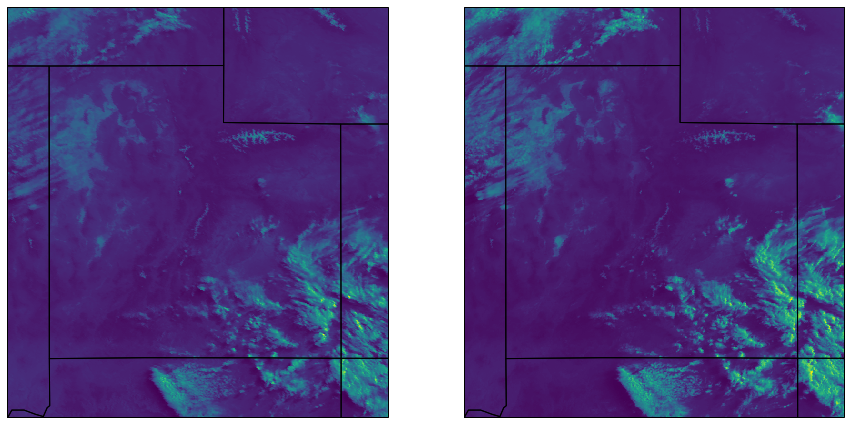

In [22]:
from pyresample import image, geometry
import pyproj
from pyproj import Proj
prj = pyproj.Proj("+proj=eqc +units=m") 
a = prj(-114.75, 36) # lower left coordinates
b = prj(-108.25, 43) # upper right coordinates
extent = a + b

goes16_area = geometry.AreaDefinition('GOES-16', 'CONUS',
                                'GOES-16',
                                {'a': 6378137.0,
                                 'b': 6356752.31414,
                                 'rf': 298.2572221,
                                 'proj': 'geos',
                                 'lon_0': -75.0,
                                 'lat_0': 0.0,
                                'h': 35786023.0,
                                 'x_0': 0,
                                 'y_0': 0,
                                 'units': 'm',
                                 'sweep': 'x'},
                                G_16.shape[1], G_16.shape[0],
                              [float(x16.min()), float(y16.min()),float(x16.max()),  float(y16.max())])
goes17_area = geometry.AreaDefinition('GOES-17', 'CONUS',
                                'GOES-17',
                                {'a': 6378137.0,
                                 'b': 6356752.31414,
                                 'rf': 298.2572221,
                                 'proj': 'geos',
                                 'lon_0': -137.0,
                                 'lat_0': 0.0,
                                 'h': 35786023.0,
                                 'x_0': 0,
                                 'y_0': 0,
                                 'units': 'm',
                                 'sweep': 'x'},
                                G_17.shape[1], G_17.shape[0],
                              [float(x17.min()), float(y17.min()),float(x17.max()),  float(y17.max())])
area_pc_def = geometry.AreaDefinition('areaD', 'CONUS-UTAH', 'areaD',
                                  {'ellps': 'WGS84',
                                   'proj': 'eqc', 
                                   'lon_0': 0},
                                    800, 800,extent)
geos16_con_nn = image.ImageContainerNearest(G_16, goes16_area, radius_of_influence=50000)
area_con_nn_16 = geos16_con_nn.resample(area_pc_def)
image_pc_16 = area_con_nn_16.image_data

geos17_con_nn = image.ImageContainerNearest(G_17, goes17_area, radius_of_influence=50000)
area_con_nn_17 = geos17_con_nn.resample(area_pc_def)
image_pc_17 = area_con_nn_17.image_data

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(1, 2, 1, projection=pc)
ax2 = fig.add_subplot(1, 2, 2, projection=pc)

ax1.set_extent([-114.75, -108.25, 36, 43], crs=pc)
ax1.imshow(image_pc_16, extent=[-114.75, -108.25, 36, 43], origin='upper')
ax1.add_feature(ccrs.cartopy.feature.STATES)
ax2.set_extent([-114.75, -108.25, 36, 43], crs=pc)
ax2.imshow(image_pc_17, extent=[-114.75, -108.25, 36, 43], origin='upper')
ax2.add_feature(ccrs.cartopy.feature.STATES)

In [19]:
def radDropNaN(my2DArray,completeIndex):
    myArray = []
    for i in completeIndex:
        myArray.append(my2DArray[i])
    return myArray

In [205]:
def parseFullIndex(subIndices,originalVector):
    subVector =[]
    for i in range(len(subIndices)):
        element = originalVector[i-1]
        subVector.append(int(element))
    return subVector

In [192]:
###WIP ######################################

###WIP ######################################

###WIP ######################################
def make_RGB_RAD(C, night_IR=True):
    """
    C        - GOES file opened with xarray
    night_IR - Set nighttime pixels as clean IR channel (channel 13, 10.3 um).
    """
    
    # Load the color (band) channel into appropriate R, G, and B variables
    R = C['RAD'].data

    ######################################################################
    #

    # Apply range limits for each channel. RGB values must be between 0 and 1
    R = np.clip(R, 0, 1)
    G = np.clip(G, 0, 1)
    B = np.clip(B, 0, 1)

    ######################################################################
    #

    # Apply a gamma correction to the image
    gamma = 2.2
    R = np.power(R, 1/gamma)
    G = np.power(G, 1/gamma)
    B = np.power(B, 1/gamma)

    ######################################################################
    #

    # Calculate the "True" Green
    G_true = 0.45 * R + 0.1 * G + 0.45 * B
    G_true = np.maximum(G_true, 0)
    G_true = np.minimum(G_true, 1)
    
    # The RGB array with the raw veggie band
    RGB_veggie = np.dstack([R, G, B])

    # The RGB array for the true color image
    RGB = np.dstack([R, G_true, B])
    
    if night_IR:
        cleanIR = C['CMI_C13'].data
        # Normalize the channel between a range. e.g. cleanIR =
        # (cleanIR-minimum)/(maximum-minimum)
        cleanIR = (cleanIR-90)/(313-90)

        # Apply range limits for each channel. RGB values must be between 0 and 1
        cleanIR = np.clip(cleanIR, 0, 1)

        # Invert colors so that cold clouds are white
        cleanIR = 1 - cleanIR

        # Lessen the brightness of the coldest clouds so they don't appear so bright
        # when we overlay it on the true color image
        cleanIR = cleanIR/1.4
    
        # Fill RGB where true color is black with IR values.
        RGB = np.dstack([np.maximum(R, cleanIR),
                         np.maximum(G_true, cleanIR),
                         np.maximum(B, cleanIR)])
        
    return RGB
# Make RGB for both GOES16 and GOES17

In [252]:
pc = ccrs.PlateCarree()

# Generate cartopy projection object with metpy parser
# NOTE: Don't re-run this cell after it has run or it won't work.
dat16 = G16.metpy.parse_cf('Rad')
dat17 = G17.metpy.parse_cf('Rad')

#print(float(dat16.x.min()))
#print(float(dat16.x.max()))

# Geostationary projections
geos16 = dat16.metpy.cartopy_crs
geos17 = dat17.metpy.cartopy_crs

data_df_16 = pd.DataFrame(G_16)
df_16 = data_df_16.dropna()
sub_Index_x = df_16.index
array_16 = radDropNaN(G_16,sub_Index_x)

x16 = parseFullIndex(sub_Index_x,dat16.x)
y16 = dat16.y

data_df_17 = pd.DataFrame(G_17)
df_17 = data_df_17.dropna()
sub_Index_x = df_17.index
array_17 = radDropNaN(G_17,sub_Index_x)

x17 = parseFullIndex(sub_Index_x,dat17.x)
y17 = dat17.y


/opt/home/adomakor412/.conda/envs/GOESCode/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/opt/home/adomakor412/.conda/envs/GOESCode/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


In [ ]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection=geos17)
ax2 = fig.add_subplot(1, 2, 2, projection=geos16)


## GOES 17
ax1.imshow(G_17, origin='upper', extent=(min(x17), max(x17), min(y17), max(y17)),
           transform=geos17)
ax1.coastlines(resolution='50m', color='black', linewidth=.75)
ax1.add_feature(ccrs.cartopy.feature.STATES, linewidth=.5)
ax1.set_title('GOES-17')

## GOES 16
ax2.imshow(G_16, origin='upper', extent=(min(x17), max(x17), min(y17), max(y17)),
           transform=geos16)
ax2.coastlines(resolution='50m', color='black', linewidth=.75)
ax2.add_feature(ccrs.cartopy.feature.STATES, linewidth=.5)
ax2.set_title('GOES-16')

fig.subplots_adjust(wspace=.01)